In [52]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.1f}'.format
df = pd.read_csv("cleveland_HD.txt")


In [3]:
df.isna().sum().sum()

6

In [4]:
df.drop('num',axis=1 , inplace=True)
df.drop('ca',axis=1 , inplace=True)

In [5]:
all_columns = df.columns.tolist()
for column in all_columns:
    df[column] = df[column].fillna(math.ceil(df[column].mean()))

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,3.0


In [7]:
df.isna().sum().sum()

0

In [8]:
int_columns = [elem for elem in all_columns]
int_columns.remove('oldpeak')
for column in int_columns:
    df = df.astype({column:"int"})

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3
2,67,1,4,120,229,0,2,129,1,2.6,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,3
4,41,0,2,130,204,0,2,172,0,1.4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,7
299,68,1,4,144,193,1,0,141,0,3.4,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,7
301,57,0,2,130,236,0,2,174,0,0.0,2,3


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.4,0.7,3.2,131.7,246.7,0.1,1.0,149.6,0.3,1.0,1.6,4.7
std,9.0,0.5,1.0,17.6,51.8,0.4,1.0,22.9,0.5,1.2,0.6,1.9
min,29.0,0.0,1.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,1.0,3.0
25%,48.0,0.0,3.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,3.0
50%,56.0,1.0,3.0,130.0,241.0,0.0,1.0,153.0,0.0,0.8,2.0,3.0
75%,61.0,1.0,4.0,140.0,275.0,0.0,2.0,166.0,1.0,1.6,2.0,7.0
max,77.0,1.0,4.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,3.0,7.0


In [11]:
"""change_columns = [elem for elem in all_columns]
change_columns.remove('cp')
change_columns.remove('fbs')
change_columns.remove('slope')
change_columns.remove('ca')
for column in change_columns:
    df[column].mask((stats.zscore(df[column]) > 1.5) | (stats.zscore(df[column]) < -1.5), math.ceil(df[column].mean()), inplace=True)"""

"change_columns = [elem for elem in all_columns]\nchange_columns.remove('cp')\nchange_columns.remove('fbs')\nchange_columns.remove('slope')\nchange_columns.remove('ca')\nfor column in change_columns:\n    df[column].mask((stats.zscore(df[column]) > 1.5) | (stats.zscore(df[column]) < -1.5), math.ceil(df[column].mean()), inplace=True)"

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3
2,67,1,4,120,229,0,2,129,1,2.6,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,3
4,41,0,2,130,204,0,2,172,0,1.4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,7
299,68,1,4,144,193,1,0,141,0,3.4,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,7
301,57,0,2,130,236,0,2,174,0,0.0,2,3


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.4,0.7,3.2,131.7,246.7,0.1,1.0,149.6,0.3,1.0,1.6,4.7
std,9.0,0.5,1.0,17.6,51.8,0.4,1.0,22.9,0.5,1.2,0.6,1.9
min,29.0,0.0,1.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,1.0,3.0
25%,48.0,0.0,3.0,120.0,211.0,0.0,0.0,133.5,0.0,0.0,1.0,3.0
50%,56.0,1.0,3.0,130.0,241.0,0.0,1.0,153.0,0.0,0.8,2.0,3.0
75%,61.0,1.0,4.0,140.0,275.0,0.0,2.0,166.0,1.0,1.6,2.0,7.0
max,77.0,1.0,4.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,3.0,7.0


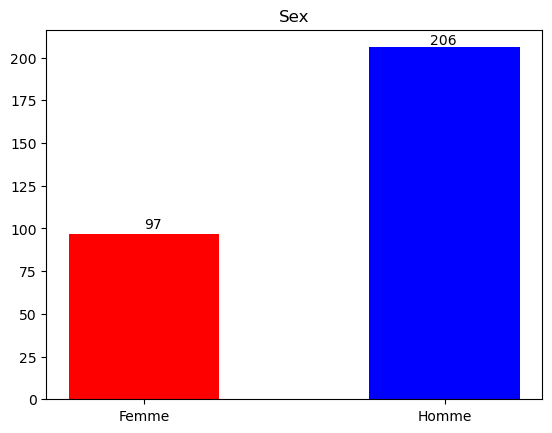

In [14]:
list_sex_count = [df['sex'].to_list().count(0), df['sex'].to_list().count(1)]
list_sex = ["Femme", 'Homme']
colors = ['r', 'b']
plt.bar(list_sex, list_sex_count, width= 0.5, color= colors )
plt.annotate(xy=[0, 100], text=f'{list_sex_count[0]}')
plt.annotate(xy=[0.95, 208], text=f'{list_sex_count[1]}')
plt.title('Sex')
plt.show()

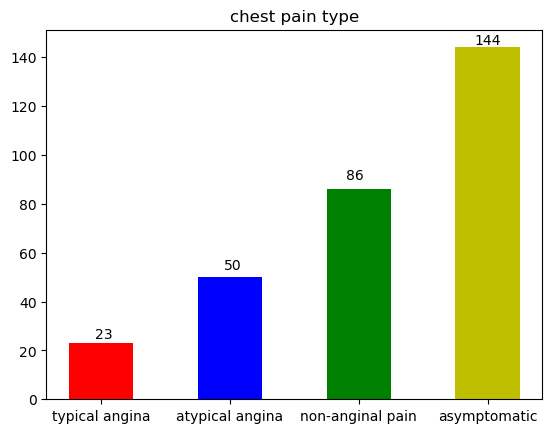

In [15]:
list_cp_count = [df['cp'].to_list().count(1), df['cp'].to_list().count(2), df['cp'].to_list().count(3), df['cp'].to_list().count(4)]
list_cp = ["typical angina", 'atypical angina', 'non-anginal pain', 'asymptomatic']
colors = ['r', 'b', 'g', 'y']
plt.bar(list_cp, list_cp_count, width= 0.5, color= colors )
plt.annotate(xy=[-0.05, 25], text=f'{list_cp_count[0]}')
plt.annotate(xy=[0.95, 53], text=f'{list_cp_count[1]}')
plt.annotate(xy=[1.9, 90], text=f'{list_cp_count[2]}')
plt.annotate(xy=[2.9, 145], text=f'{list_cp_count[3]}')
plt.title("chest pain type")
plt.show()

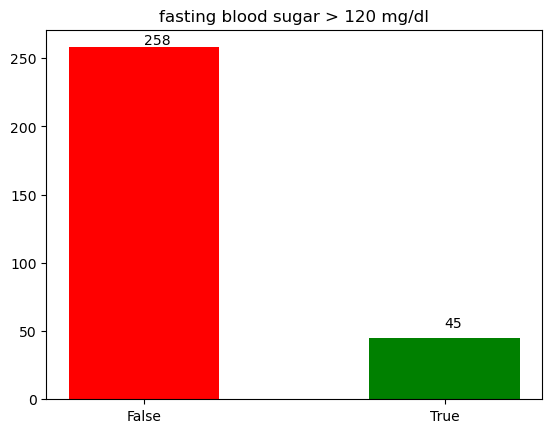

In [16]:
list_fbs_count = [df['fbs'].to_list().count(0), df['fbs'].to_list().count(1)]
list_fbs = ["False", 'True']
colors = ['r', 'g']
plt.bar(list_fbs, list_fbs_count, width= 0.5, color= colors )
plt.annotate(xy=[0, 260], text=f'{list_fbs_count[0]}')
plt.annotate(xy=[1, 53], text=f'{list_fbs_count[1]}')
plt.title('fasting blood sugar > 120 mg/dl')
plt.show()

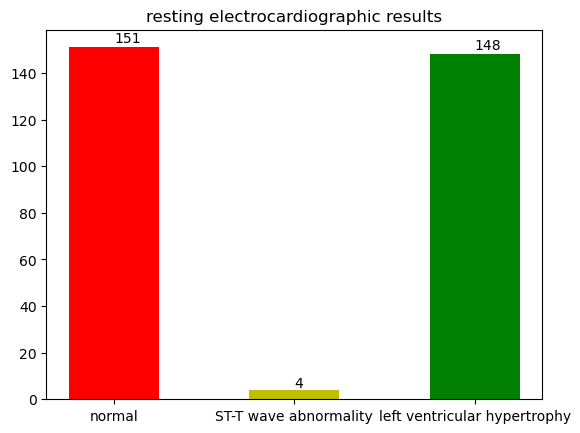

In [17]:
list_restecg_count = [df['restecg'].to_list().count(0), df['restecg'].to_list().count(1), df['restecg'].to_list().count(2)]
list_restecg = ["normal", 'ST-T wave abnormality', 'left ventricular hypertrophy']
colors = ['r', 'y', 'g']
plt.bar(list_restecg, list_restecg_count, width= 0.5, color= colors )
plt.annotate(xy=[0, 153], text=f'{list_restecg_count[0]}')
plt.annotate(xy=[1, 5], text=f'{list_restecg_count[1]}')
plt.annotate(xy=[2, 150], text=f'{list_restecg_count[2]}')
plt.title('resting electrocardiographic results')
plt.show()

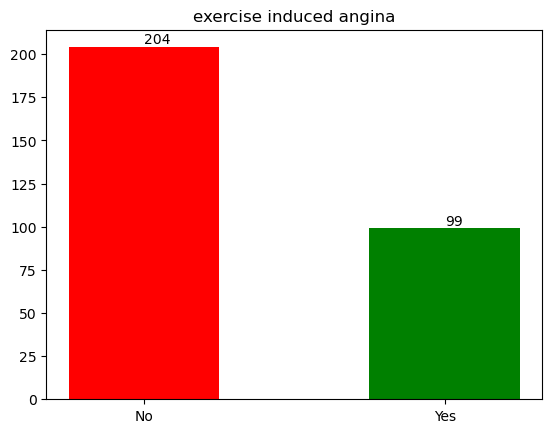

In [18]:
list_exang_count = [df['exang'].to_list().count(0), df['exang'].to_list().count(1)]
list_exang = ["No", 'Yes']
colors = ['r', 'g']
plt.bar(list_exang, list_exang_count, width= 0.5, color= colors )
plt.annotate(xy=[0, 206], text=f'{list_exang_count[0]}')
plt.annotate(xy=[1, 101], text=f'{list_exang_count[1]}')
plt.title('exercise induced angina')
plt.show()

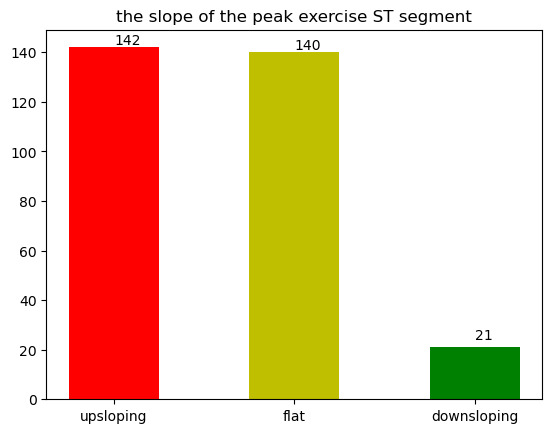

In [19]:
list_slope_count = [df['slope'].to_list().count(1), df['slope'].to_list().count(2), df['slope'].to_list().count(3)]
list_slope = ["upsloping", 'flat', 'downsloping']
colors = ['r', 'y', 'g']
plt.bar(list_slope, list_slope_count, width= 0.5, color= colors )
plt.annotate(xy=[0, 143], text=f'{list_slope_count[0]}')
plt.annotate(xy=[1, 141], text=f'{list_slope_count[1]}')
plt.annotate(xy=[2, 24], text=f'{list_slope_count[2]}')
plt.title('the slope of the peak exercise ST segment')
plt.show()

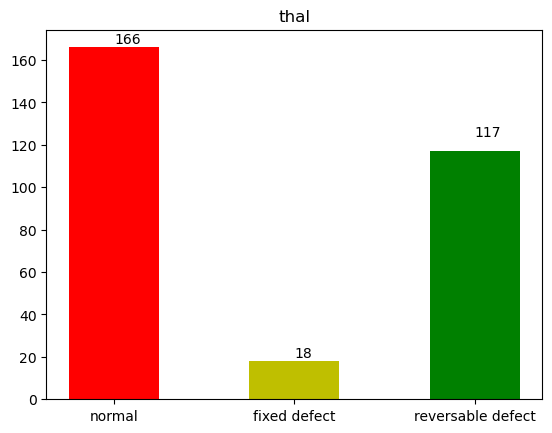

In [20]:
list_thal_count = [df['thal'].to_list().count(3), df['thal'].to_list().count(6), df['thal'].to_list().count(7)]
list_thal = ["normal", 'fixed defect', 'reversable defect']
colors = ['r', 'y', 'g']
plt.bar(list_thal, list_thal_count, width= 0.5, color= colors )
plt.annotate(xy=[0, 168], text=f'{list_thal_count[0]}')
plt.annotate(xy=[1, 20], text=f'{list_thal_count[1]}')
plt.annotate(xy=[2, 124], text=f'{list_thal_count[2]}')
plt.title('thal')
plt.show()

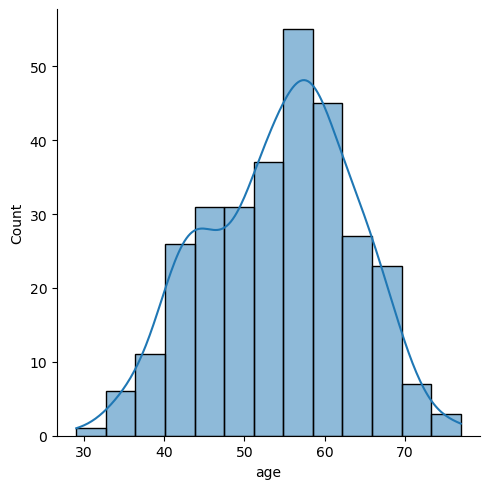

In [69]:
sns.displot(df['age'], kde=True)

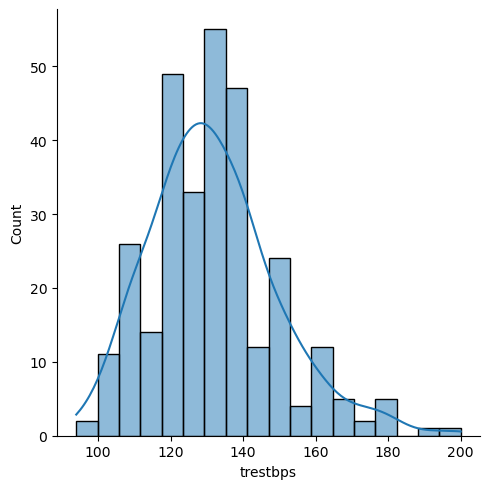

In [70]:
sns.displot(df['trestbps'], kde=True)

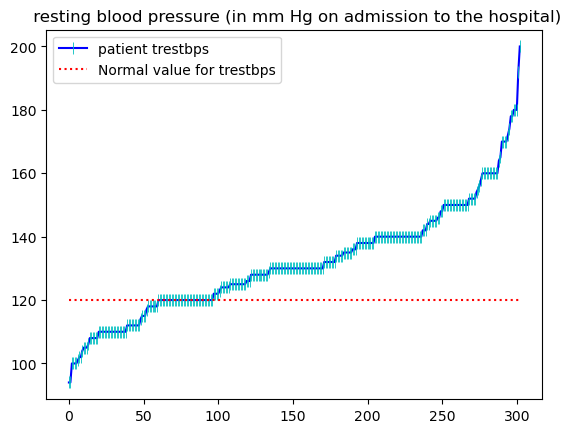

In [40]:
normal_value = [120 for i in range(303)]
plt.plot(sorted(df['trestbps']), color='b', marker='|', markeredgecolor='c', markersize=9, markeredgewidth=0.6)
plt.plot(normal_value, color='r', linestyle=':')
plt.legend(['patient trestbps', 'Normal value for trestbps'], loc=2)
plt.title(' resting blood pressure (in mm Hg on admission to the hospital)')
plt.show()

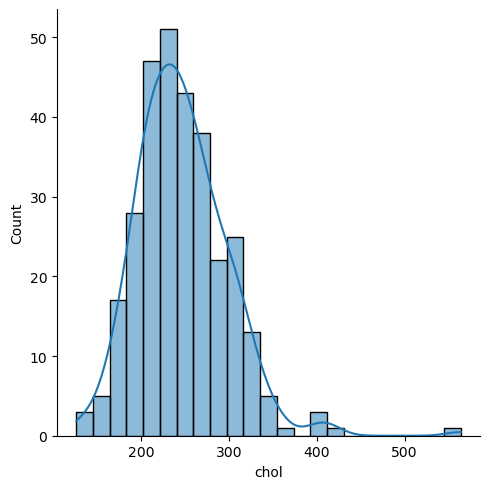

In [71]:
sns.displot(df['chol'], kde=True)

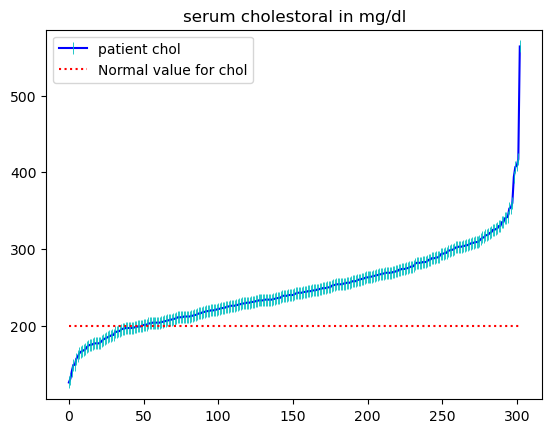

In [47]:
normal_value = [200 for i in range(303)]
plt.plot(sorted(df['chol']), color='b', marker='|', markeredgecolor='c', markersize=9, markeredgewidth=0.6)
plt.plot(normal_value, color='r', linestyle=':')
plt.legend(['patient chol', 'Normal value for chol'], loc=2)
plt.title('serum cholestoral in mg/dl')
plt.show()

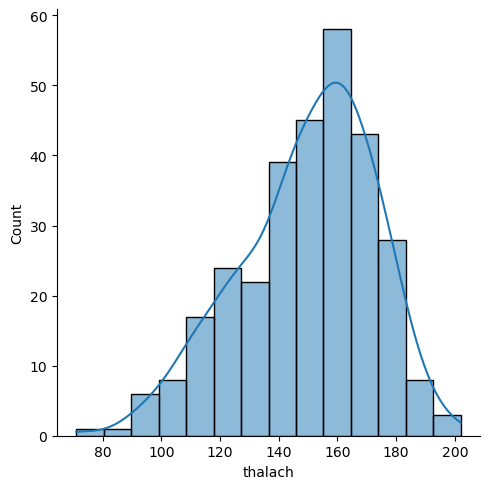

In [68]:
sns.displot(df['thalach'], kde=True)

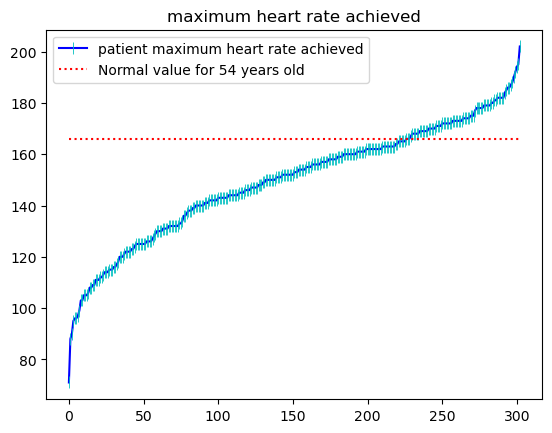

In [44]:
age_mean =int(df['age'].mean())
normal_value = [math.ceil(220-df['age'].mean()) for i in range(303)]
plt.plot(sorted(df['thalach']), color='b', marker='|', markeredgecolor='c', markersize=9, markeredgewidth=0.6)
plt.plot(normal_value, color='r', linestyle=':')
plt.legend(['patient maximum heart rate achieved', f'Normal value for {age_mean} years old'], loc=2)
plt.title('maximum heart rate achieved')
plt.show()

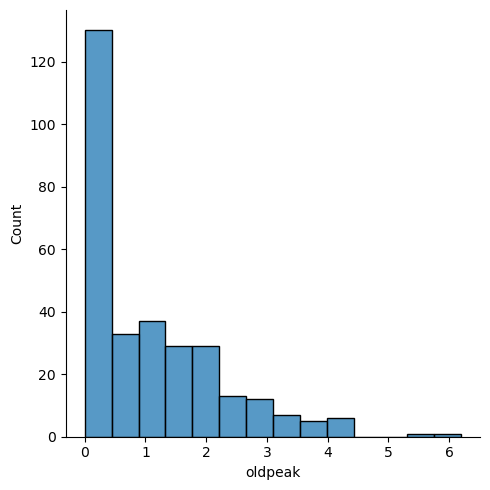

In [66]:
sns.displot(df['oldpeak'])